# 3. 머신러닝 프로젝트 진행과정

---

## 학습 목표
- 머신러닝 프로젝트 수행하기 위해서 그 진행 과정을 학습합니다.
- 머신러닝 모델 선택에 앞서 데이터를 분석하고 정제하는 방법을 학습합니다.

---

## 목차

### 2. 탐색적 데이터 분석
1. 데이터 확인
2. 데이터 정제
3. 특성 엔지니어링
4. 상관 관계 분석


---

### 2-2. 데이터 정제

데이터 정제는 Raw 데이터 확인 과정에서 누락된 데이터나 이상치 데이터를 정리하는 과정을 의미합니다.

#### 결측값 처리

우선 누락된 데이터(missing data)인 결측값을 어떻게 처리해야 하는지 알아봅시다.

아래의 코드를 실행하면 각 변수 별로 존재하는 결측값의 개수를 알 수 있습니다.

In [1]:
import pandas as pd

titanic = pd.read_csv('./train.csv')

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

이렇게 결측값이 존재하는 상태로 모델을 만들게 될 경우, 변수 간의 관계가 왜곡될 수 있기 때문에 모델의 정확성이 떨어지게 됩니다.

따라서 아래와 같은 방법으로 결측값을 처리합니다.

**삭제**

삭제 방식으로는 결측값이 발생한 변수를 삭제하는 **전체 삭제**와 결측값이 발생한 관측치가 있다면 다른 변수에 값이 존재하더라고 그 인덱스 행에 해당되는 데이터를 모두 삭제하는 **부분 삭제** 방식이 있습니다.

**전체 삭제 예**

전체 삭제는 결측값이 있는 변수를 제거하는 것을 의미합니다.

`Cabin`의 경우 과반수 이상의 데이터가 손실되어 있기에 데이터로서의 유의미한 정보를 가지고 있다고 보기 어렵습니다.

아래 코드를 통하여 `Cabin` 변수의 데이터를 삭제합니다.

In [3]:
titanic.drop(['Cabin'], axis='columns', inplace=True)

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [4]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [5]:
titanic.shape

(891, 11)

`inplace=True`는 새로운 정보로 업데이트 하고 싶을 때 사용합니다.

예를 들어, Cabin 변수를 제거한 데이터를 titanic 이라는 객체 그대로에 저장하는 경우를 의미합니다.

`inplace=True` 를 설정하지 않는다면 또 다른 변수에 데이터를 저장해야 합니다.

**부분 삭제 예**

전체 데이터 수가 891개 인데 `Age`의 데이터가 177개 결측되었다고 `Age` 변수 자체를 제거하기엔 삭제하기엔 정보 손실이 너무 클 수 있습니다.

이 경우 결측값이 생긴 데이터의 행을 부분적으로 삭제하는 방법을 사용하여 처리합니다.

아래 코드를 실행하면 자동으로 결측값이 있는 행렬을 삭제합니다.

In [6]:
del_titanic = titanic.dropna()

In [7]:
del_titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [8]:
del_titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    712 non-null int64
Survived       712 non-null int64
Pclass         712 non-null int64
Name           712 non-null object
Sex            712 non-null object
Age            712 non-null float64
SibSp          712 non-null int64
Parch          712 non-null int64
Ticket         712 non-null object
Fare           712 non-null float64
Embarked       712 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 66.8+ KB


모든 변수에 대해서 결측값이 존재하는 행이 제거되어 712개의 데이터가 남았으나 데이터의 index는 여전히 0 to 890 입니다.

**다른 값으로 대체**

결측값이 발생한 경우 다른 관측치의 평균, 최빈값, 중간값 등으로 대체할 수 있습니다.

일반적으로 데이터의 개수가 적어 삭제보다 다른 값으로 대체해야 할 때 이러한 방법을 사용합니다.

대체 방법으로는 모든 관측치를 일괄적으로 대체하는 **일괄 대체**와 범주형 변수를 활용하여 유사한 유형의 평균값 등으로 대체하는 **유사유형 대체**가 있습니다.

**일괄 대체**

대체 방법 중, 일괄 대체는 결측값을 특정값으로 일괄 대체하는 것을 의미합니다.

특정값으로는 해당 변수의 데이터 분포를 보고 평균값이나 중간값 등을 선정하여 대체하게 됩니다.

In [9]:
rep_titanic = titanic
rep_titanic['Age'] = titanic['Age'].fillna(titanic['Age'].mean()) # 평균값으로 대체
# rep_titanic['Age'] = titanic['Age'].fillna(titanic['Age'].median()) # 중간값으로 대체

In [10]:
rep_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


위 예처럼 `fillna` 함수를 사용하여 결측값을 대체할 수 있습니다. 

대체되는 값은 위 코드에서 사용한 평균값, 중간값 혹은 사용자가 선택한 다른 특정값을 사용합니다.

`Age` 데이터의 경우 숫자형 데이터이기에 평균값이나 중간값으로 대체가 가능했습니다.

하지만 `Embarked`의 경우는 문자형으로 되어 있는 데이터이기에 평균 혹은 중간값으로 대체가 불가능 합니다.

변수 확인에서 알 수 있듯이 `Embarked`는 `S, C, Q`값 중에 하나를 갖기에 이중에 하나의 값으로 대체합니다.

`S` 데이터가 제일 많았기에 결측값 2개는 다른 값들에 비해서 `S`일 확률이 높을 것이기에 `S`값으로 결측값을 대체합니다. 

아래와 같은 코드를 수행하여 결측값을 대체합니다.

In [11]:
rep_titanic['Embarked'] = titanic['Embarked'].fillna('S')

In [12]:
rep_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


여러 방식으로 대체를 하였지만, 어떤 값을 사용할지는 데이터를 분석하는 주관적 판단에 의해 결정되기에 자칫 의미 없는 값을 사용하게 되면 데이터의 왜곡이 일어날 수 있습니다. 

따라서 대체 방식은 신중한 판단을 요구합니다.

**유사 유형 대체 예**

일괄적으로 모든 값을 대체하는 것 보단 각 값들에 대해서 예측값으로 대체를 하면 데이터의 신뢰도는 높아질 것입니다.

그렇다면 예측값은 어떻게 구할 수 있을까요?

바로 머신러닝 기법을 사용하여 구할 수 있습니다.

결측값이 있지 않는 다른 데이터들을 머신러닝을 사용해 학습하고 이를 바탕으로 결측값을 예측합니다.

일반적으로 연속형 데이터의 경우 회귀방식으로 예측 하고, 이산형 데이터의 경우에는 분류나 클러스터링 방식을 사용하여 결측값을 예측합니다.

아직 회귀나 분류, 클러스터링 기법에 대해 배우지 않았기에 이러한 방식으로 대체할 수 있다는 것만 알고 넘어갑시다.

#### 이상치 처리

이상치(outlier)란 데이터/샘플과 동떨어진 관측치로, 머신러닝 모델을 왜곡할 가능성이 있는 관측치를 의미합니다.

이상치를 찾아내기 위한 쉽고 간단한 방법은 Raw 데이터 확인 과정에서 시각화된 변수의 분포를 보고 동떨어진 값을 찾는 것입니다.

이상치 처리를 수행하기 위해서 우선 정제된 `Age` 변수 데이터를 다시 출력해 봅시다.

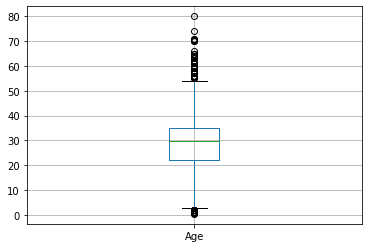

In [13]:
boxplot = titanic.boxplot(column = ['Age'])

`boxplot`의 25~75% 구간인 박스는 IQR(Inter Quartile Range)라고 부릅니다.

25%부분에서 아래로 1.5배 IQR 크기만큼 내려가면 최소값 검은선으로 표시되어 있고, 마찬가지로 75%부분에서 위로 1.5배 IQR 크기만큼 올라가면 최대값이 검은선으로 표시되어 있습니다.

이 검은 선을 벗어나는 값들을 우리는 IQR의 범위를 벗어나는 이상치라 표현합니다.

이러한 이상치를 눈으로 확인하는 것 뿐만 아니라 실제 값들을 코드를 통해 구하는 방법은 아래와 같습니다.

In [14]:
box_bottom = titanic['Age'].quantile(.25)
box_top = titanic['Age'].quantile(.75)

IQR = box_top - box_bottom

out_top = titanic[titanic['Age']>box_top+1.5*IQR]
out_bottom = titanic[titanic['Age']<box_bottom-1.5*IQR]

print("box_bottom: {}\n".format(box_bottom))
print("box_top: {}\n".format(box_top))
print("out_top: \n{}\n".format(out_top))
print("out_bottom: \n{}".format(out_bottom))

box_bottom: 22.0

box_top: 35.0

out_top: 
     PassengerId  Survived  Pclass  \
11            12         1       1   
15            16         1       2   
33            34         0       2   
54            55         0       1   
94            95         0       3   
96            97         0       1   
116          117         0       3   
152          153         0       3   
170          171         0       1   
174          175         0       1   
195          196         1       1   
232          233         0       2   
252          253         0       1   
268          269         1       1   
275          276         1       1   
280          281         0       3   
326          327         0       3   
366          367         1       1   
438          439         0       1   
456          457         0       1   
467          468         0       1   
483          484         1       3   
487          488         0       1   
492          493         0       1   
493    

IQR 방식 이외에도 `Z-score`, `Median Absolute Deviation` 방식이 존재하며, 차원축소와 같은 머신러닝 기법을 사용하여 이상치를 해결할 수도 있습니다.

또한 도메인 지식을 가진 사람은 직접 변수 확인을 통하여 이상치를 구분할 수도 있습니다.

확인한 이상치를 처리하기 위해서 다음과 같은 방법을 사용합니다.

- 단순 삭제
- 다른 값으로 대체
- 변수화

**단순 삭제**

이상치가 휴먼 에러에 의해서 발생한 경우, 해당 관측치를 삭제합니다.

휴먼 에러란 기계의 조작이나 특정한 명령의 수행, 계획 단계에서 사람에 의해 발생하는 실수를 의미합니다. 

`between`함수를 사용하여 이상치가 아닌 구간을 묶어 새로 저장합니다.

In [15]:
out_age_del_titanic = titanic[titanic['Age'].between(box_bottom - 1.5 * IQR, box_top + 1.5 * IQR)]

In [16]:
out_age_del_titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 825 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    825 non-null int64
Survived       825 non-null int64
Pclass         825 non-null int64
Name           825 non-null object
Sex            825 non-null object
Age            825 non-null float64
SibSp          825 non-null int64
Parch          825 non-null int64
Ticket         825 non-null object
Fare           825 non-null float64
Embarked       825 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 77.3+ KB


**다른 값으로 대체**

절대적인 관측치의 숫자가 작은 경우, 삭제의 방법으로 이상치를 제거하면 관측치의 절대량이 작아지는 문제가 발생합니다.

이러한 경우 평균값과 같은 다른 특정값으로 대체할 수 있습니다.

`Age` 변수의 이상치 값을 평균값을 대체하면 다음과 같습니다.

In [17]:
# 업데이트할 데이터 프레임 만들기
out_age_rep_titanic = titanic

# 이상치에 해당되는 인덱스를 뽑아 해당 인덱스에 대체 값 입력
for i in out_top['Age'].index:
    print("index: {}  Age: {} -> {}".format(i,out_age_rep_titanic['Age'][i],int(out_age_rep_titanic['Age'].mean())))
    out_age_rep_titanic.loc[i]['Age'] = int(out_age_rep_titanic['Age'].mean())

index: 11  Age: 58.0 -> 29
index: 15  Age: 55.0 -> 29
index: 33  Age: 66.0 -> 29
index: 54  Age: 65.0 -> 29
index: 94  Age: 59.0 -> 29
index: 96  Age: 71.0 -> 29
index: 116  Age: 70.5 -> 29
index: 152  Age: 55.5 -> 29
index: 170  Age: 61.0 -> 29
index: 174  Age: 56.0 -> 29
index: 195  Age: 58.0 -> 29
index: 232  Age: 59.0 -> 29
index: 252  Age: 62.0 -> 29
index: 268  Age: 58.0 -> 29
index: 275  Age: 63.0 -> 29
index: 280  Age: 65.0 -> 29
index: 326  Age: 61.0 -> 29
index: 366  Age: 60.0 -> 29
index: 438  Age: 64.0 -> 29
index: 456  Age: 65.0 -> 29
index: 467  Age: 56.0 -> 29
index: 483  Age: 63.0 -> 29
index: 487  Age: 58.0 -> 29
index: 492  Age: 55.0 -> 29
index: 493  Age: 71.0 -> 29
index: 545  Age: 64.0 -> 29
index: 555  Age: 62.0 -> 29
index: 570  Age: 62.0 -> 29
index: 587  Age: 60.0 -> 29
index: 625  Age: 61.0 -> 29
index: 626  Age: 57.0 -> 29
index: 630  Age: 80.0 -> 29
index: 647  Age: 56.0 -> 29
index: 659  Age: 58.0 -> 29
index: 672  Age: 70.0 -> 29
index: 684  Age: 60.0 -> 2

C:\python\envs\cpu_env\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


**변수화**

이상치 처리 방법으로 단순 삭제나 대체의 방법 외에도 변수화라는 방법이 존재합니다.

이상치가 휴먼 에러에 의해서 생성된 것이 아니라면, 이상치만의 유의미한 정보가 있다고 판단할 수도 있습니다.

이 경우, 이상치를 새로운 변수로 구분하여 이상치를 활용할 수 있게 합니다.

`Age` 변수의 경우 IQR 방식으로 약 54세 이상부터는 이상치라 판단했습니다.

하지만, 54세 이상의 사람들은 휴먼 에러에 의해 생성된 데이터가 아니고 이에 대해서도 분석할 필요가 있습니다.

이런 경우, `Age` 변수에 대해서는 이상치 처리를 하지 않는 방법도 있고 아니면 다음과 같은 변수화 방법으로 IQR로 이상치 데이터들을 구분하여 분석할 수 있습니다.

`Age` 변수의 이상치를 변수화로 처리 위해서는 50세를 기준으로 하여 이상인 경우 yes, 미만인 경우 no 값을 채우는 `elder` 변수를 새롭게 만들 수 있습니다.

In [18]:
titanic['elder'] = 'yes'

titanic.loc[titanic['Age'] < 50,'elder'] = 'no'

In [19]:
titanic['elder']

0      no
1      no
2      no
3      no
4      no
       ..
886    no
887    no
888    no
889    no
890    no
Name: elder, Length: 891, dtype: object

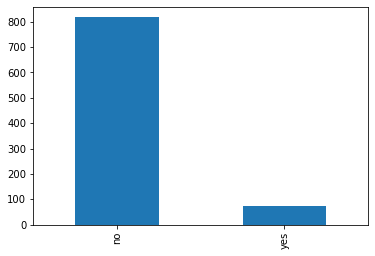

In [20]:
titanic['elder'].value_counts().plot(kind='bar')

---